In [3]:
import pandas as pd


In [7]:
ti=pd.read_csv("https://raw.githubusercontent.com/a-forty-two/QA_9_MAY_22_BDML/main/titanic.csv")


In [8]:
ti

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


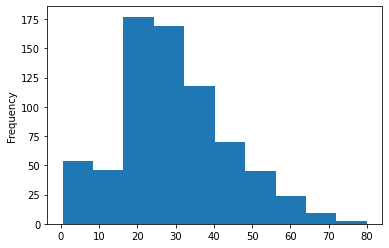

In [9]:
ti['age'].plot(kind='hist');


In [10]:
import seaborn as sns


### Checks for emptiness and cleanse data

In [11]:
ti.isna().sum() #check for emptiness

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [12]:
#replace NaNs in numerical fields with the mean values
ti=ti.fillna(ti.mean())

C:\Users\2211587\AppData\Local\Temp\23\ipykernel_28708\777617271.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ti=ti.fillna(ti.mean())


In [13]:
# fill every column with its own most frequent value 
ti = ti.apply(lambda x:x.fillna(x.value_counts().index[0])) 

There are two ways of using seaborn, you can either

* supply x (, y, etc.) as individual arguments
* OR: supply a *dataframe* and name the relevant columns

C:\Users\2211587\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


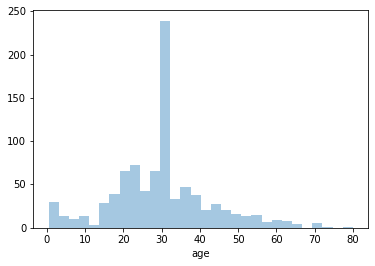

In [14]:
sns.distplot(ti['age'], kde=False);

##### What is the kde?

* approximation of the distribution using a linear combination of normal distributions

* further reading: https://seaborn.pydata.org/tutorial/distributions.html#kernel-density-estimation

C:\Users\2211587\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='fare'>

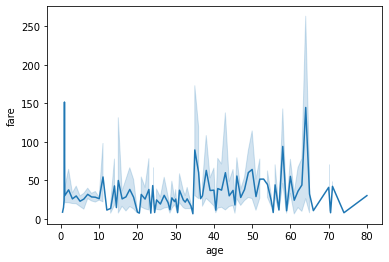

In [15]:
sns.lineplot(ti['age'], ti['fare'])


## How do I use a dataframe with seaborn?

We set `data` to be the dataframe, and *name the columns* for `x` and `y`... 

<AxesSubplot:xlabel='age', ylabel='fare'>

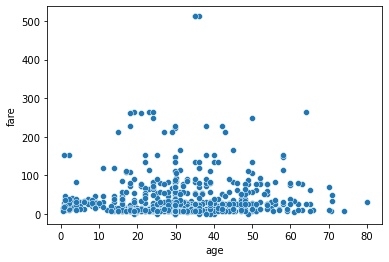

In [17]:
sns.scatterplot(data=ti, x='age', y='fare')


## How do I create a distribution plot?

C:\Users\2211587\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='survived'>

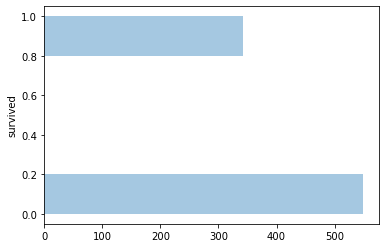

In [18]:
sns.distplot(ti['survived'], vertical=True, kde=False)


## How do I create a violin plot?

The width of a violin plot is the frequency (ie., how common) a value is within some column... 

C:\Users\2211587\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

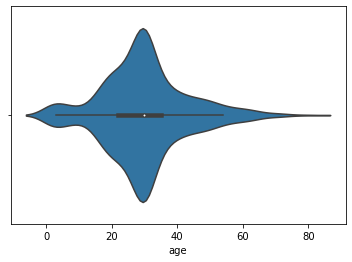

In [19]:
sns.violinplot(ti['age'])


## How do I create a box plot?

Box plots show quarties (25th, 50th, 75th) and outliers. 

C:\Users\2211587\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

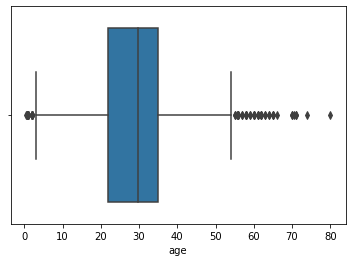

In [20]:
sns.boxplot(ti['age'])


## How do I create a violin plot for multiple columns?

A violin plot can show multiple distributions, each a subset of a single column, factored (or grouped) by another.

<AxesSubplot:xlabel='survived', ylabel='age'>

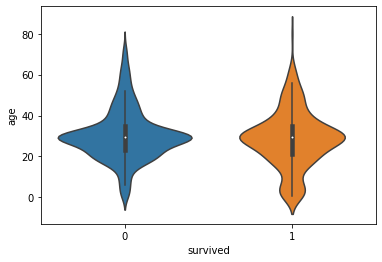

In [21]:
sns.violinplot(data=ti, x='survived', y='age')


<AxesSubplot:xlabel='age', ylabel='embark_town'>

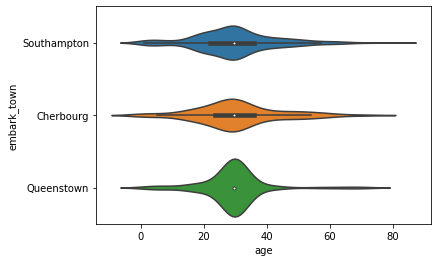

In [22]:
sns.violinplot(data=ti, x="age", y='embark_town')

## How do I create a bar plor for multiple columns?

Bar plots are useful for discrete data or for showing, here, the means:

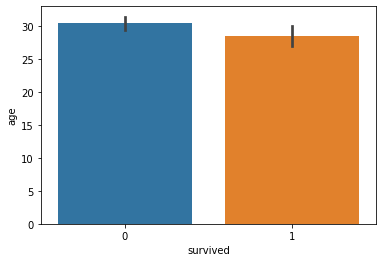

In [23]:
sns.barplot(data=ti, x='survived', y='age');


## How do I create a line plot?

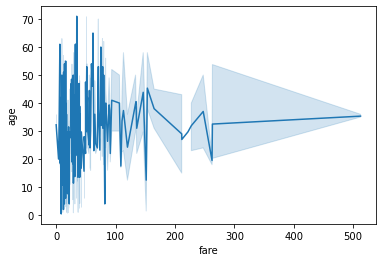

In [24]:
sns.lineplot(data=ti, x='fare', y='age');


###### NB: would creating a scatter plot be more appropriate?


## How do I create a scatter plot?

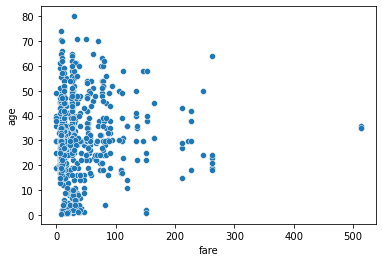

In [25]:
sns.scatterplot(data=ti, x='fare', y='age');


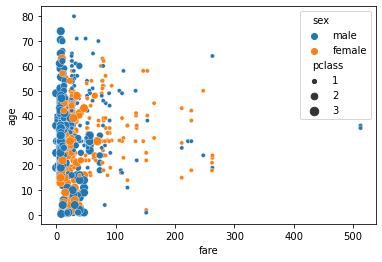

In [26]:
sns.scatterplot(data=ti, x='fare', y='age', 
                hue = 'sex', 
                size = 'pclass');

### EXTRA: Tips
* Often for the sake of communication, using excel is both faster and leads to better visuals
* use `df.to_csv()` to save the data behind a visual
* use excel to heavily customize the layout (and then, eg., copy powerpoint)

In [33]:
ti.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True


In [29]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

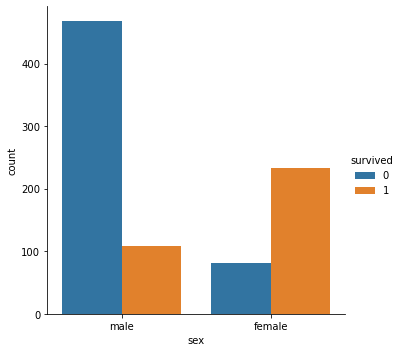

In [37]:
# Countplot
sns.catplot(x ="sex", hue ="survived",
kind ="count", data = ti)

<AxesSubplot:xlabel='survived', ylabel='pclass'>

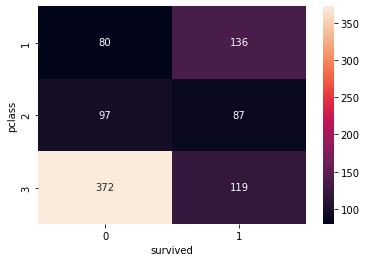

In [39]:
# Group the dataset by Pclass and Survived and then unstack them
group = ti.groupby(['pclass', 'survived'])
pclass_survived = group.size().unstack()
 
# Heatmap - Color encoded 2D representation of data.
sns.heatmap(pclass_survived, annot = True, fmt ="d")

<AxesSubplot:xlabel='sex', ylabel='age'>

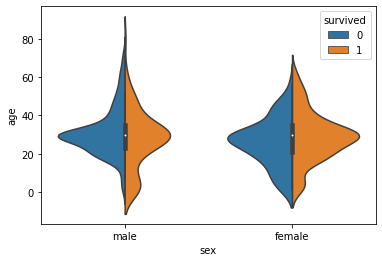

In [44]:
# Violinplot Displays distribution of data
# across all levels of a category.
sns.violinplot(x ="sex", y ="age", hue ="survived",
data = ti, split = True)

In [47]:
ti.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Family_Size
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True,0


C:\Users\2211587\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


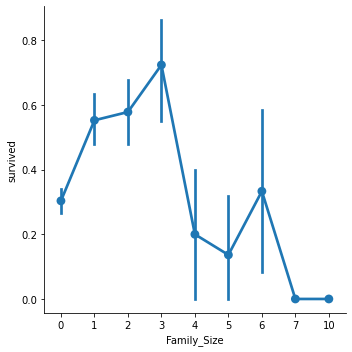

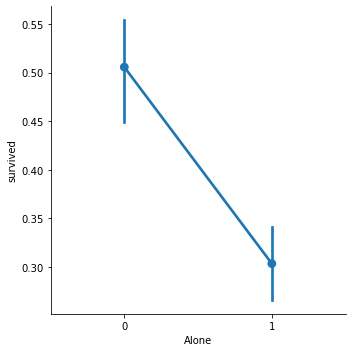

In [49]:
# Adding a column Family_Size
ti['Family_Size'] = 0
ti['Family_Size'] = ti['parch']+ti['sibsp']
 
# Adding a column Alone
ti['Alone'] = 0
ti.loc[ti.Family_Size == 0, 'Alone'] = 1
 
# Factorplot for Family_Size
sns.factorplot(x ='Family_Size', y ='survived', data = ti)
 
# Factorplot for Alone
sns.factorplot(x ='Alone', y ='survived', data = ti)

Family_Size denotes the number of people in a passenger’s family. It is calculated by summing the SibSp and Parch columns of a respective passenger. Also, another column Alone is added to check the chances of survival of a lone passenger against the one with a family.

### Important observations – 

* If a passenger is alone, the survival rate is less.
* If the family size is greater than 5, chances of survival decrease considerably.

<AxesSubplot:xlabel='Fare_Range', ylabel='survived'>

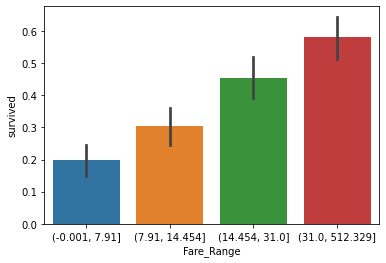

In [50]:
# Divide Fare into 4 bins
ti['Fare_Range'] = pd.qcut(ti['fare'], 4)
 
# Barplot - Shows approximate values based
# on the height of bars.
sns.barplot(x ='Fare_Range', y ='survived',
data = ti)

Fare denotes the fare paid by a passenger. As the values in this column are continuous, they need to be put in separate bins(as done for Age feature) to get a clear idea. It can be concluded that if a passenger paid a higher fare, the survival rate is more.

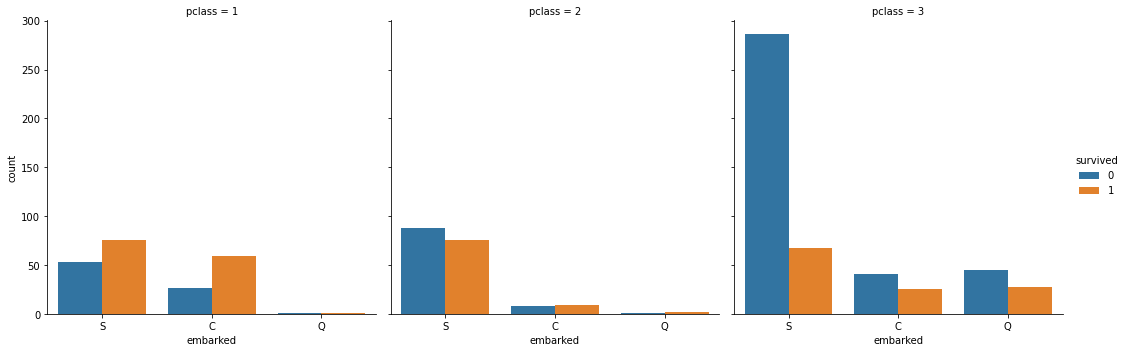

In [51]:

# Countplot
sns.catplot(x ='embarked', hue ='survived',
kind ='count', col ='pclass', data = ti)

#### Some notable observations are: 

* Majority of the passengers boarded from S. So, the missing values can be filled with S.
* Majority of class 3 passengers boarded from Q.
* S looks lucky for class 1 and 2 passengers compared to class 3.

### women vs. men


In [60]:
data=pd.read_csv("https://raw.githubusercontent.com/a-forty-two/QA_9_MAY_22_BDML/main/titanic.csv")


survived    0    1
sex               
female     81  233
male      468  109


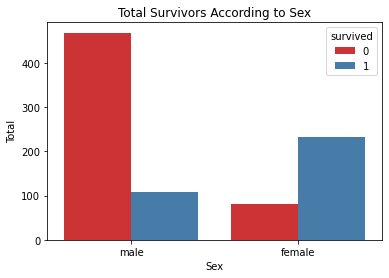

In [61]:
print(pd.crosstab(data["sex"],data.survived))
ax = sns.countplot(x = 'sex', hue = 'survived', palette = 'Set1', data = data)
ax.set(title = 'Total Survivors According to Sex', xlabel = 'Sex', ylabel='Total')
plt.show()

### old vs. young

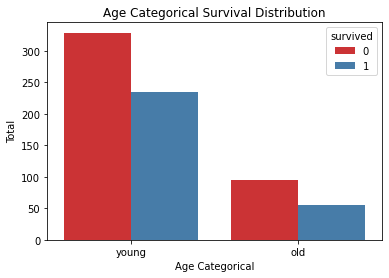

In [62]:
# We look at Age column and set Intevals on the ages and the map them to their categories as
# (Children, Teen, Adult, Old)
interval = (0,40,120)
categories = ['young','old']
data['Age_cats'] = pd.cut(data.age, interval, labels = categories)

ax = sns.countplot(x = 'Age_cats',  data = data, hue = 'survived', palette = 'Set1')

ax.set(xlabel='Age Categorical', ylabel='Total',
       title="Age Categorical Survival Distribution")

plt.show()

young survived more than the old

### survival distribution based on where passengers embarked from

survived    0    1
embarked          
C          75   93
Q          47   30
S         427  217


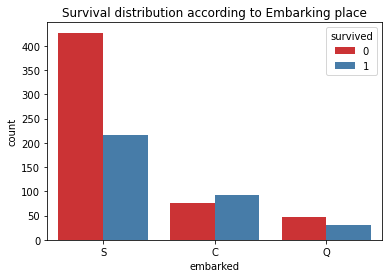

'survived'

In [63]:
print(pd.crosstab(data['embarked'], data.survived))
ax = sns.countplot(x = 'embarked', hue = 'survived', palette = 'Set1', data = data)
ax.set(title = 'Survival distribution according to Embarking place')
plt.show()
survived     